In [2]:
#****Developed by Arjun Haridas-C0819605, Pooja Vijayan-C0814627, Govind Vijayan-C0819805****
#Group-3 CBD 2204 1  Big Data Strategies Assignment-2

#Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [3]:
#importing dataset and printing 10 rows
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
#Dataset processing steps

In [6]:
df.shape

(5110, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#droping attribute id from dataset
df.drop("id",inplace=True,axis=1)

In [10]:
#comparing gender attribute and stroke rate
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

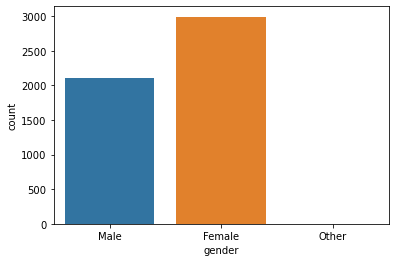

In [11]:
sns.countplot(data=df,x='gender')


<AxesSubplot:xlabel='gender', ylabel='count'>

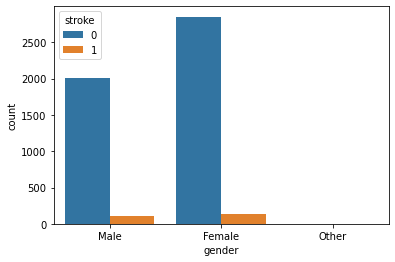

In [12]:
sns.countplot(data=df,x='gender',hue='stroke')

In [13]:
#comparing age attribute and stroke rate
df['age'].nunique()

104

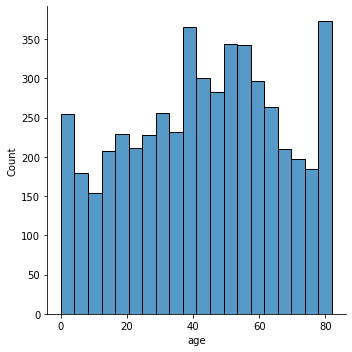

In [14]:
sns.displot(df['age'])

In [15]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='stroke', ylabel='age'>

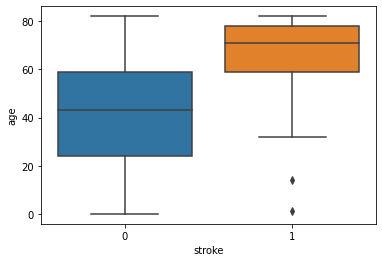

In [16]:
sns.boxplot(data=df,x='stroke',y='age')


In [17]:
#comparing hypertension attribute and stroke rate
df['hypertension'].nunique()

2

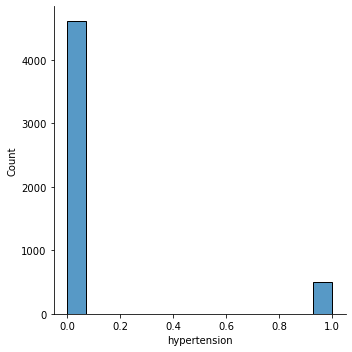

In [18]:
sns.displot(df['hypertension'])

In [19]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='hypertension', ylabel='count'>

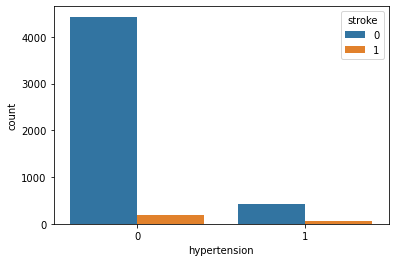

In [20]:
sns.countplot(data=df,x='hypertension',hue='stroke')

In [21]:
#comparing heart_disease attribute and stroke rate
print('Unique Value\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

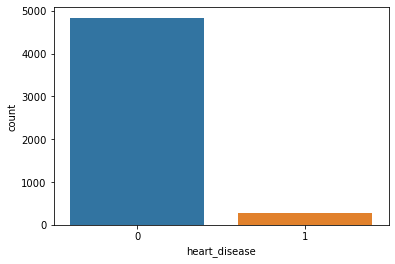

In [22]:
sns.countplot(data=df,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

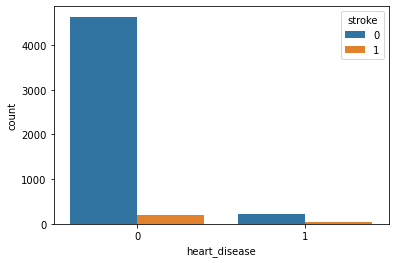

In [23]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

In [24]:
#comparing ever_married attribute and stroke rate
print('Unique Values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

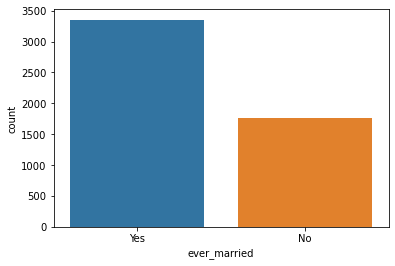

In [25]:
sns.countplot(data=df,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

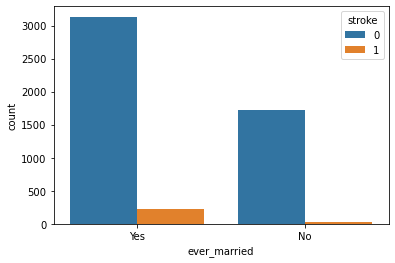

In [26]:
sns.countplot(data=df,x='ever_married',hue='stroke')

In [27]:
#comparing work_type attribute and stroke rate
print('Unique Value\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

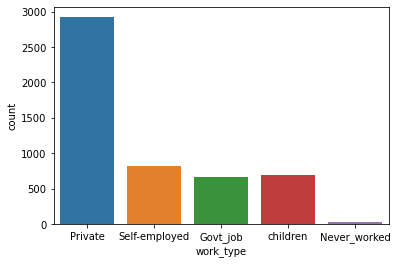

In [28]:
sns.countplot(data=df,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

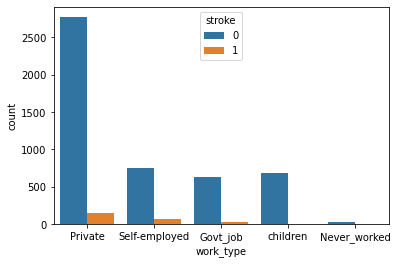

In [29]:
sns.countplot(data=df,x='work_type',hue='stroke')

In [30]:
#comparing Residence_type attribute and stroke rate
print('Unique Values\n',df['Residence_type'].unique())
print("Value Counts\n",df['Residence_type'].value_counts())

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

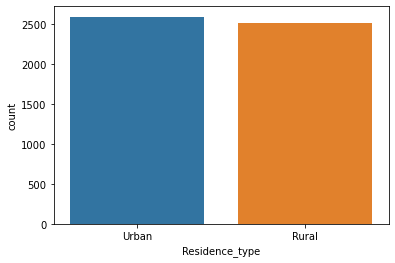

In [31]:
sns.countplot(data=df,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

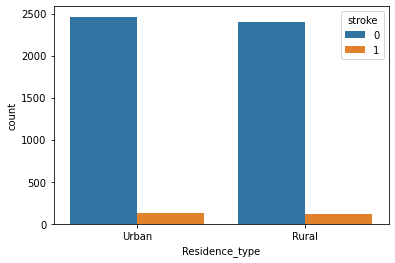

In [32]:
sns.countplot(data=df,x='Residence_type',hue='stroke')

In [33]:
#comparing avg_glucose_level attribute and stroke rate
df['avg_glucose_level'].nunique()

3979

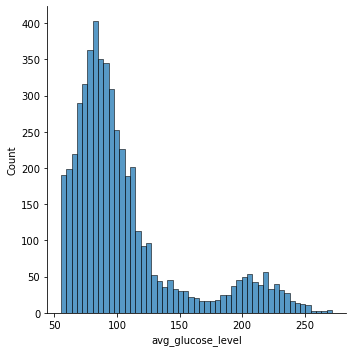

In [34]:
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

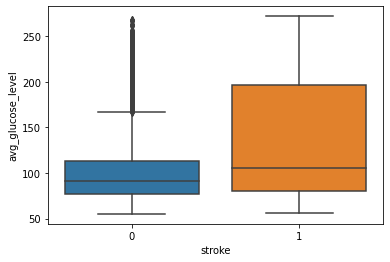

In [35]:
sns.boxplot(data=df,x='stroke',y='avg_glucose_level')

In [36]:
#comparing bmi attribute and stroke rate
df['bmi'].isna().sum()

201

In [37]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [38]:
df['bmi'].nunique()

419

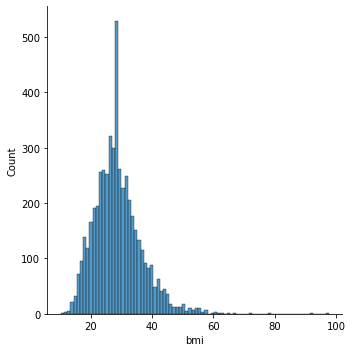

In [39]:
sns.displot(df['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

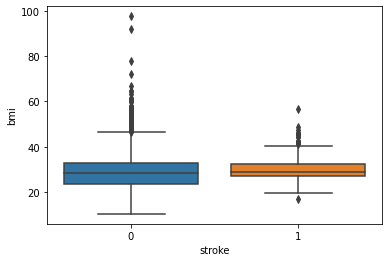

In [40]:
sns.boxplot(data=df,x='stroke',y='bmi')

In [41]:
#comparing smoking_status attribute and stroke rate
print('Unique Values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

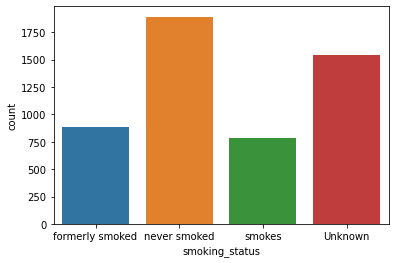

In [42]:
sns.countplot(data=df,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

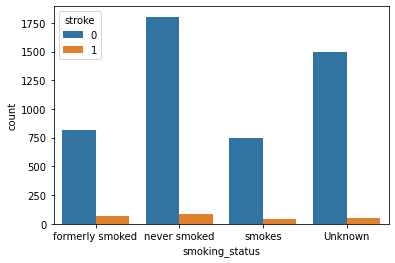

In [43]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

In [44]:
#printing and plotting unique values of stroke(target attribute)
print('Unique Value\n',df['stroke'].unique())
print('Value Counts\n',df['stroke'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

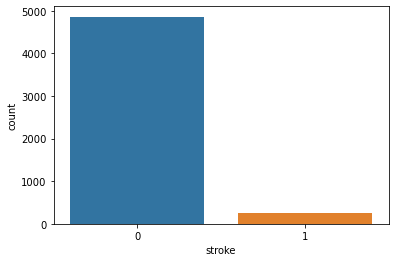

In [45]:
sns.countplot(data=df,x='stroke')

In [46]:
#casting Object type attributes to numerical values
cols=df.select_dtypes(include=['object']).columns
print(cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [47]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [49]:
df[cols]=df[cols].apply(le.fit_transform)

In [50]:
print(df.head(10))

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237 

<AxesSubplot:>

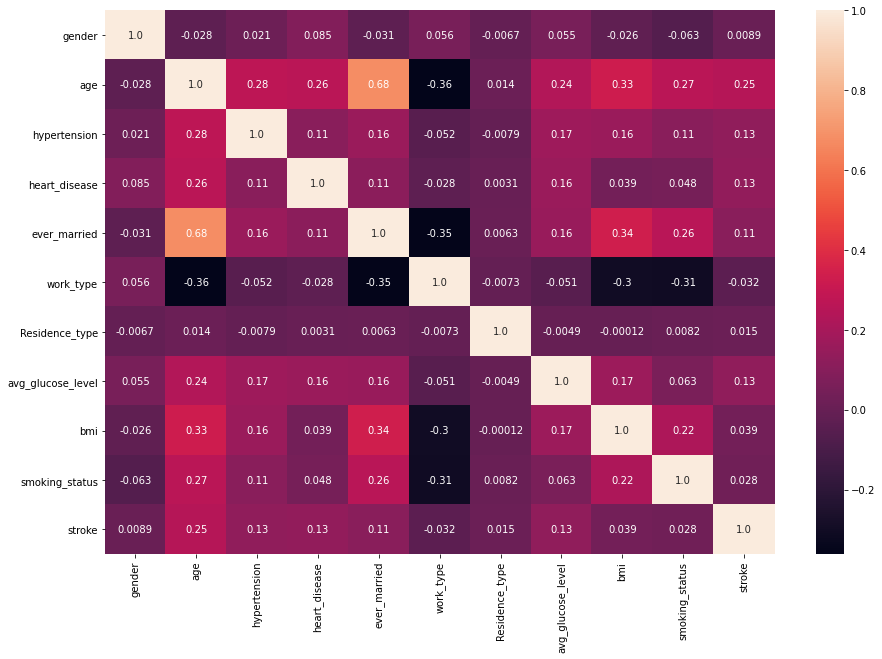

In [51]:
#heat map to find correlation between features and target variable
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

In [53]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [54]:
#SelectKBest method to find correlation of attributes with target variable
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [55]:
#setting score of SelectKBest method greater than 50, dataset is updated.
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [58]:
#Splitting data set to training 75% and testing set 25%
train_x,test_x,train_y,test_y=train_test_split(df[cols],df['stroke'],random_state=1255,test_size=0.25)
#Splitting data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
# Shape of data

((3832, 5), (1278, 5), (3832,), (1278,))

In [59]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(3832, 5) (3832,) (1278, 5) (1278,)


In [90]:
#initializing models array to store and compare different models accuracy.
models=[]
models = pd.DataFrame(columns=["Model","Accuracy Score"])


In [91]:
#LogisticRegression model prediction
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
predictions = log_reg.predict(test_x)
score = accuracy_score(predictions, test_y)
print(f"LogisticRegression: {score}")

new_row={"Model": "LogisticRegression", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

LogisticRegression: 0.9491392801251957


In [108]:
#LogisticRegression model predicted value and actual value comparision
y_test_predict = log_reg.predict(test_x)

In [115]:
y_compare_linear = pd.DataFrame({'Actual-Value': test_y, 'Predicted-Value':y_test_predict})
y_compare_linear.head()

,Actual-Value,Predicted-Value
1546,0,0
1814,0,0
3326,0,0
4498,0,0
1652,0,0


In [ ]:
#GaussianNB model prediction

In [92]:
GNB = GaussianNB()
GNB.fit(train_x, train_y)
predictions = GNB.predict(test_x)
score = accuracy_score(predictions, test_y)
print(f"GaussianNB: {score}")

new_row={"Model": "GaussianNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

GaussianNB: 0.8748043818466353


In [93]:
#BernoulliNB model prediction
BNB = BernoulliNB()
BNB.fit(train_x, train_y)
predictions = BNB.predict(test_x)
score = accuracy_score(predictions, test_y)
print(f"BernoulliNB: {score}")

new_row={"Model": "BernoulliNB", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

BernoulliNB: 0.9491392801251957


In [94]:
#RandomForestRegressor model prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg = RandomForestRegressor(max_features='sqrt')
reg.fit(train_x,train_y)

RandomForestRegressor(max_features='sqrt')

In [95]:
RandomForestRegressor(max_features='sqrt')

RandomForestRegressor(max_features='sqrt')

In [96]:
y_pred = reg.predict(train_x)

In [97]:
print ("Evaluation criteria using R2, MSE and RMSE for Training Set")

Evaluation criteria using R2, MSE and RMSE for Training Set


In [98]:
from sklearn import metrics

In [99]:
r2 = r2_score(train_y, y_pred)
mse = metrics.mean_squared_error(train_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(train_y,y_pred))

In [100]:
print ("The Evaluation of Training set")
print('R2 Score:', r2)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)

The Evaluation of Training set
R2 Score: 0.8478422566266208
Mean Squared Error: 0.0069552974947807945
Root Mean Squared Error: 0.08339842621285365


In [101]:
randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(train_x, train_y)
predictions = randomforest.predict(test_x)
score = accuracy_score(predictions, test_y)
print(f"RandomForestClassifier: {score}")

new_row={"Model": "RandomForestClassifier", "Accuracy Score": score}
models = models.append(new_row, ignore_index=True)

RandomForestClassifier: 0.9374021909233177


In [102]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
0,LogisticRegression,0.949139
2,BernoulliNB,0.949139
3,RandomForestClassifier,0.937402
1,GaussianNB,0.874804
